In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io

df = pd.read_csv('Manaus.csv', sep=';', encoding='latin-1')

c:\users\luiz fabio\appdata\local\programs\python\python38-32\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (15,21,23,29,30,31,32,34) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.head()

,_idade,_faixa etária,_sexo,_bairro,_classificacao,_comorb_renal,_comorb_diabetes,_comorb_imuno,_comorb_cardio,_conclusao,...,_comorb_neurologica,_comorb_hemato,_comorb_obessidade,_origem,_evolução,_teste_pcr,_teste_anticorpo,_teste_antigeno,_teste_igm,_teste_igg
0,37.0,30a - 39a,F,CIDADE NOVA,Confirmado,Não,Não,Não,Não,NaN,...,NaN,NaN,NaN,"eSUS VE,",NaN,1.0,0.0,0.0,0.0,0.0
1,30.0,30a - 39a,M,JAPIIM,Confirmado,Não,Não,Não,Não,NaN,...,NaN,NaN,NaN,"eSUS VE,",NaN,1.0,0.0,0.0,0.0,0.0
2,30.0,30a - 39a,M,FLORES,Confirmado,Não,Não,Não,Não,NaN,...,NaN,NaN,NaN,"eSUS VE,",NaN,1.0,0.0,0.0,0.0,0.0
3,54.0,50a - 59a,M,TANCREDO NEVES,Em análise,Não,Não,Não,Não,Recuperado,...,NaN,NaN,NaN,"eSUS VE,",NaN,0.0,0.0,0.0,0.0,0.0
4,43.0,40a - 49a,F,FLORES,Confirmado,Não,Não,Não,Não,NaN,...,NaN,NaN,NaN,"eSUS VE,",NaN,1.0,0.0,0.0,0.0,0.0


In [4]:
casos_confirmados = df.loc[df['_classificacao'] == 'Confirmado']

In [5]:
casos_confirmados_dt_notificao = casos_confirmados.filter(items=['_dt_notificacao'])

In [6]:
casos_confirmados_dt_notificao = casos_confirmados_dt_notificao['_dt_notificacao'].value_counts()

In [7]:
list_of_tuples = list(zip(casos_confirmados_dt_notificao.index, casos_confirmados_dt_notificao.values))  
datas_casos = pd.DataFrame(list_of_tuples, columns = ['Datas', 'Casos'])
n = datas_casos['Datas'].size

display(datas_casos)

,Datas,Casos
0,28/05/2020,765
1,27/05/2020,723
2,22/05/2020,712
3,12/05/2020,706
4,29/05/2020,646
...,...,...
152,06/03/2020,1
153,23/02/2020,1
154,11/03/2020,1
155,17/03/2020,1


In [8]:
switcher = {
    '01': "January",
    '02': "February",
    '03': "March",
    '04': "April",
    '05': "May",
    '06': "June",
    '07': "July",
    '08': "August",
    '09': "September",
    '10': "October",
    '11': "November",
    '12': "December"
}

for i in range (n):
    codigo_mes = datas_casos['Datas'][i][3:5]
    nome_mes = switcher.get(codigo_mes)
    datas_casos['Datas'][i] = nome_mes

display(datas_casos)

<ipython-input-8-c906ff052421>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datas_casos['Datas'][i] = nome_mes


,Datas,Casos
0,May,765
1,May,723
2,May,712
3,May,706
4,May,646
...,...,...
152,March,1
153,February,1
154,March,1
155,March,1


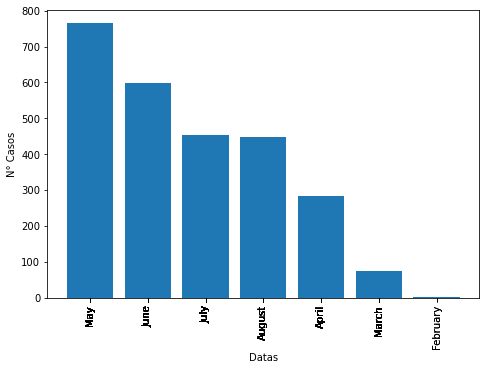

In [10]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(datas_casos['Datas'], datas_casos['Casos'])
ax.set_xlabel('Datas')
ax.set_ylabel('N° Casos')
plt.xticks(datas_casos['Datas'],rotation=90)
plt.show()